<a href="https://colab.research.google.com/github/Yomi-09/PrograIII-Semi-2025/blob/librer%C3%ADa/uso_librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
ruta = "/content/notas.csv"
notas = pd.read_csv(ruta, sep=";", encoding="utf-8")

In [ ]:
print(notas)

   alumno  nota
0    Luis     5
1    Juan     8
2   Maria     9
3    Jose    10
4   Oscar     4
5   Pedro     5
6   Ramon     7
7  Carmen     5


In [ ]:
print( notas["alumno"][0] )

Luis


In [ ]:
#saca el listado de los alumnos aprobados
aprobados  = notas[ notas["nota"]>=6 ]
print(aprobados)

  alumno  nota
1   Juan     8
2  Maria     9
3   Jose    10
6  Ramon     7


In [ ]:
#sacar el listado de los alumnos reprobados
reprobados = notas[ notas["nota"]<6 ]
print(reprobados)

   alumno  nota
0    Luis     5
4   Oscar     4
5   Pedro     5
7  Carmen     5


In [ ]:
print("Cantidad de Alumnos aprobados", len(aprobados))

cantidad_aprobados = notas.loc[ notas["nota"]>=6 ].agg({"count"})
print(cantidad_aprobados)

Cantidad de Alumnos aprobados 4
       alumno  nota
count       4     4


In [ ]:
print("Cantidad de Alumnos reprobados", len(reprobados))

cantidad_reprobados = notas.loc[ notas["nota"]<6 ].agg({"count"})
print(cantidad_reprobados)

Cantidad de Alumnos reprobados 4
       alumno  nota
count       4     4


In [ ]:
grupo_notas = notas.groupby(["nota"]).agg({
    'alumno': lambda n: ', '.join( map(str,n) )
})
print(grupo_notas)

                   alumno
nota                     
4                   Oscar
5     Luis, Pedro, Carmen
7                   Ramon
8                    Juan
9                   Maria
10                   Jose


In [ ]:
#importar las librerias para graficas
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
notas['estado'] = notas['nota'].apply(lambda n: 'Aprobado' if n >= 6 else 'Reprobado')

/tmp/ipython-input-1800193188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=notas, x='estado', palette={'Aprobado': 'green', 'Reprobado': 'red'})


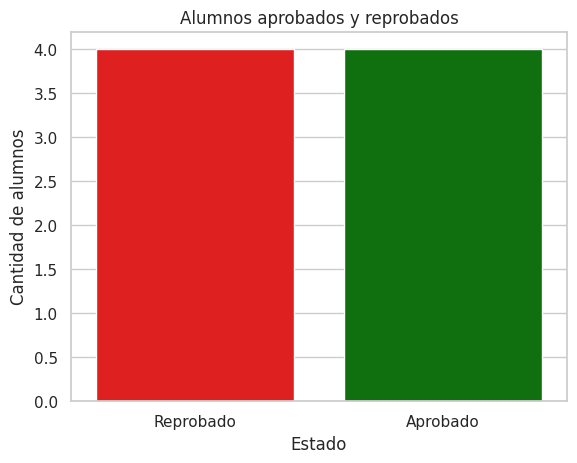

In [ ]:
sns.set(style="whitegrid")
sns.countplot(data=notas, x='estado', palette={'Aprobado': 'green', 'Reprobado': 'red'})
plt.title('Alumnos aprobados y reprobados')
plt.xlabel('Estado')
plt.ylabel('Cantidad de alumnos')
plt.show()

**EJERCICIO:** En python Realizar la clasficicacion de edades de los alumnos cuantos son mayores de edad y cuantos son menores de edad.

**Enternar una IA con la libreria de tensorflow que convierta gradis celsius a farenheits**

In [ ]:
#importar las librerias necesarias
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
#leer el archivo de las temperaturas para el entrenamiento
grados = pd.read_csv("/content/grados.csv", sep=";", encoding="utf-8")
print(grados, grados["f"])

      c      f
0   -40  -40.0
1   -35  -31.0
2   -30  -22.0
3   -25  -13.0
4   -20   -4.0
5   -15    5.0
6   -10   14.0
7    -8   17.6
8    -5   23.0
9    -2   28.4
10    0   32.0
11    1   33.8
12    3   37.4
13    5   41.0
14   10   50.0
15   12   53.6
16   14   57.2
17   16   60.8
18   18   64.4
19   20   68.0
20   22   71.6
21   24   75.2
22   26   78.8
23   30   86.0
24   35   95.0
25   40  104.0
26   45  113.0
27   50  122.0
28   60  140.0
29  100  212.0 0     -40.0
1     -31.0
2     -22.0
3     -13.0
4      -4.0
5       5.0
6      14.0
7      17.6
8      23.0
9      28.4
10     32.0
11     33.8
12     37.4
13     41.0
14     50.0
15     53.6
16     57.2
17     60.8
18     64.4
19     68.0
20     71.6
21     75.2
22     78.8
23     86.0
24     95.0
25    104.0
26    113.0
27    122.0
28    140.0
29    212.0
Name: f, dtype: float64


In [ ]:
c = grados["c"]
f = grados["f"]

print(c,f)

0     -40
1     -35
2     -30
3     -25
4     -20
5     -15
6     -10
7      -8
8      -5
9      -2
10      0
11      1
12      3
13      5
14     10
15     12
16     14
17     16
18     18
19     20
20     22
21     24
22     26
23     30
24     35
25     40
26     45
27     50
28     60
29    100
Name: c, dtype: int64 0     -40.0
1     -31.0
2     -22.0
3     -13.0
4      -4.0
5       5.0
6      14.0
7      17.6
8      23.0
9      28.4
10     32.0
11     33.8
12     37.4
13     41.0
14     50.0
15     53.6
16     57.2
17     60.8
18     64.4
19     68.0
20     71.6
21     75.2
22     78.8
23     86.0
24     95.0
25    104.0
26    113.0
27    122.0
28    140.0
29    212.0
Name: f, dtype: float64


In [ ]:
#modelo
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss='mean_squared_error')

In [ ]:
#entrenar el modelo
epocas = modelo.fit(c, f, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - loss: 6506.7861
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2672.7104
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 936.6592
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 932.0596
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1740.0227
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2335.6165
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2318.9607
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1841.6779
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1218.7587
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 720.1506
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 493.8246
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 543.2951
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 750.3566
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 948.3360
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/ste

In [ ]:
#prediccion
g = int(input("Celsius: "))
resp = modelo.predict(np.array([g]))
print("Farenheits: ", resp[0][0])

Celsius: 121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Farenheits:  249.8008


In [ ]:
#guardar el modelo
modelo.save("grados.h5")

In [ ]:
#Entrenar una IA con la libreria de tensorflow que convierta grados celsius a kelvin.
#el archivo se debe de llamar kelvin.csv

**TAREA: **
1. Entrenar de la IA para convertir Celsius a Farenheit y a Kelvin
2. Exportar (guardar) el modelo
3. Cargar el modelo de IA en Python Nativo
4. Crear la API para hacer llamadas y convertir
5. Crear la pagina web con HTML, bootstrap y JavaScript para convertir grados celsius a Farenheit y a Kelvin

**USO DE APIs PARA IA**

In [ ]:
#Intalar las librerias de openai
#!pip install openai
#!pip install google-generativeai
#!pip install requests

In [ ]:
##Conexion a ChatGPT de OpenAI
from openai import OpenAI
client = OpenAI(api_key="")
respuesta = client.chat.completions.create(
    model="gpt-5-nano-2025-08-07",
    messages=[{"role":"user","content":""}]
)
print(respuesta.choices[0].message.content)

In [ ]:
#Conexion a Gemini Google
import google.generativeai as genai
genai.configure(api_key="")
#modelo = genai.GenerativeModel("gemini-2.5-pro")
modelo = genai.GenerativeModel("gemini-2.5-flash")

In [ ]:
prompt = input("Pregunta: ")
respuesta = modelo.generate_content(prompt)
print(respuesta.text)

In [ ]:
#procesarmiento de datos
valores = [27, 30, 16]
prompt = f"Analiza esta lista de temperaturas en grados celsius y dame la respuesta en grados farenheits: {valores}"
respuesta = modelo.generate_content(prompt)
print(respuesta.text)